# Agent-Based Modeling: The Schelling Segregation model

This week we're going to implement and experiment with the classic Schelling model of segregation. 

Schelling, T. C. (1971). Dynamic models of segregation. Journal of mathematical sociology, 1(2), 143-186. https://www.tandfonline.com/doi/abs/10.1080/0022250X.1971.9989794 

The paper is amazing and very much worth reading. 

The Schelling segregation model is a very simple agent-based model that analyze the dynamics of segregation. The model is so general that it can even be applied to why water and oil separate.  

The model works with two types of agents distributed on a grid. Each agent is either type A or type B. The agents are happy if a certain percentage of their neighbors are of the same type; otherwise, they will try to move to another spot in the grid. 

Let's start by implementing the model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, animation
from IPython.display import HTML

In [2]:
# First, we initialize a grid, where each point in the grid is randomly set to be either populated by type A, by type B, or is empty
def initialize_grid(size, fraction_empty, fraction_A):
    grid = np.zeros((size, size))    
    empty_cells = [] # We keep track of empty cells also through a list, for optimization reasons, as we want to be able to find an empty cell in O(1)            
    for i in range(size):
        for j in range(size):            
            if np.random.rand() < fraction_empty:
                grid[i, j] = 0  # Empty space
                empty_cells.append((i,j))
            elif np.random.rand() < fraction_A:
                grid[i, j] = 1  # Type A
            else:
                grid[i, j] = 2  # Type B
    return grid,empty_cells



In [3]:
# This returns the fraction of the neighbors of a given agent that are of the same type.
def fraction_neighbors_same(x,y,grid):
    agent = grid[x, y]
    if agent == 0:
        return None #Don't count empty grid points
    
    # This defines a Moore neighborhood, as opposed to von Neumann neighbors
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    same = 0
    total = 0
    # Let's look in all the directions, and see who is the neighbor
    for dx, dy in directions:

        # Quiz: What type of grid typology does this define? 
        nx, ny = (x + dx) % grid.shape[0], (y + dy) % grid.shape[1]
        
        neighbor = grid[nx, ny]
        if neighbor > 0: # is not empty?
            total += 1
            if neighbor == agent:
                same += 1
    # Avoid division by zero: if there are no neighbors, we do not include the agent in the count
    if total == 0:
        return None
    return same / total


# This function checks if a specific agent is satisfied. 
# The agent is satisfied if more than a given threshold of their neighbors is of the same type as themselves.
def is_satisfied(x, y, grid, similarity_threshold):
    fraction_same = fraction_neighbors_same(x,y,grid)

    # Empty areas are always satisfied 
    if fraction_same is None:
        return True
    
    # Is fraction that are the same higher or equal to our threshold?
    return fraction_same >= similarity_threshold

In [4]:
# This is the loop that updates the model and runs the model dynamics.
def update(grid, emptycells, size, similarity_threshold, agents_per_step):
    was_move = False
    for _ in range(agents_per_step):  # Check N agents per frame
        # Pick a random point in grid
        x, y = np.random.randint(size, size=2)
        if not is_satisfied(x, y, grid, similarity_threshold):
            # Move agent to a random empty cell
            randindex = np.random.randint(len(emptycells))
            new_x,new_y = emptycells[randindex]
            
            # The old space is now empty
            emptycells[randindex] = (x,y)            
            grid[new_x, new_y], grid[x, y] = grid[x, y], 0

            was_move = True
    return grid,emptycells,was_move


### Make an animation of the dynamics of the model
Let's start by making an animation to track the changes of the model over time. 

Animations in python are unfortunately a bit clunky.

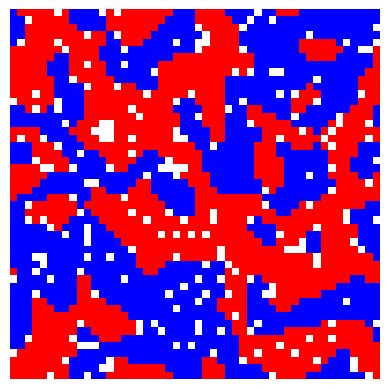

In [6]:
# Model parameters
size = 50
fraction_empty = 0.1
fraction_A = 0.5
similarity_threshold = 0.4

#Initialize grid
grid, emptycells = initialize_grid(size, fraction_empty, fraction_A)

#Initialize animation plot
fig, ax = plt.subplots()
cmap = colors.ListedColormap(['white', 'red', 'blue'])
bounds = [0, 1, 2, 3]
norm = colors.BoundaryNorm(bounds, cmap.N)
img = ax.imshow(grid, cmap=cmap, norm=norm)
ax.axis('off')

# This function handles adding frames to the video.
def update_video(frame, img, grid, emptycells, size, similarity_threshold, agents_per_step):
    if frame == 0:
        # Just display the initial state for the first frame
        img.set_array(grid)
        return (img,)
       
    # Call model function
    grid,emptycells,_ = update(grid, emptycells, size, similarity_threshold, agents_per_step)
    
    img.set_array(grid)  # Update the image object with the new grid state
    return (img,)

# Set up the animation with lambda to properly capture 'ani'
ani = animation.FuncAnimation(fig, lambda f: update_video(f, img, grid, emptycells, size, similarity_threshold, 500), frames=100, blit=True)

# Display the animation
HTML(ani.to_jshtml())


### Exercise 1: 

What is the dynamics of the model? What parameters appear to be most important for the resulting dynamics? 


## Macro-segregation as a function of individual threshold

To be more systematic of our study of the Schelling model, we need to define a formal measure of the level of segregation in the model.

There are many sophisticated ways of measuring segregation. But in this case, it's better to have an intuitive measure than a sophisticated one! 

We will use the _average similarity between neighbors_. That is, on the average, how many neighbors of the agents' are of the same type?

We will expect this value to be 0.5 when fraction_A = 0.5. (A extra point question: *What is the expected average neighbor similarity as a function of fraction_A?*)


### Exercise 2:
Define a function that calculates the average neighbor similarity, using the fraction_neighbors_same() function defined above.

Note: When the fraction_neighbors_same() return None, it should not be included in the calculation of the mean.


In [ ]:
# Calculate the average neighbors who are 
def average_neighbor_similarity(grid):
    n, m = grid.shape
    # [...  YOUR CORE HERE ...]


<hl />

In [ ]:
# Test for a random grid:
grid, emptycells = initialize_grid(50, 0.1, 0.5)
print(f"Average similar neighbors random grid: {average_neighbor_similarity(grid)}")

# When random, roughtly half the neighbors will be of the same type

### Let's see how the average changes when we run the model

In [ ]:
# Let's run the simulation and see the resulting level of segregation
size = 50
fraction_empty = 0.1
fraction_A = 0.5
similarity_threshold = 0.4
agents_per_step = 500
grid, emptycells = initialize_grid(size, fraction_empty, fraction_A)

print(f"Average similar neighbors before: {average_neighbor_similarity(grid)}")

# Run the update function 100 times or until no moves are made
for _ in range(100):
    grid, emptycells, was_move = update(grid, emptycells, size, similarity_threshold, agents_per_step)
    if not was_move:
        print("No moves were made; stopping early.")
        break

print(f"Average similar neighbors after: {average_neighbor_similarity(grid)}")

Great! It seems to be working! Now we can use it to examine in a more rigorous way how the parameters to the model affects the resulting level of segregation.

### Exercise 3: Examine how the average_neighbor_similarity changes as a function of the threshold
<a href='#solution3'>Go to solution</a>

When running simulations, we often want to know how parameters affect the resulting outcome. This allows us to study the dynamics of the model. 

Your task is to run the simulation while varying the threshold parameter between 0 and 0.6.
    
You should plot a graph that shows how the average_neighbor_similarity changes as a function of the threshold.

You can also run the model several times for each point, to capture that the model can result in varying levels of segregation each run.

(What happens when the threshold is higher than 0.6, such as 0.8? How do you explain this?)

Describe your conclusions from analyzing the model.
What is the relationship between this model and real-world segregation?


In [ ]:
# [ YOUR CODE HERE]

# SOLUTIONS

### Solution 1:
The individual threshold is the key parameter.

### Solution 2:
<a id='solution2' />

In [ ]:
# Calculate the average neighbors who are 
def average_neighbor_similarity(grid):
    n, m = grid.shape
    l = []
    for i in range(n):
        for j in range(m):
            f = fraction_neighbors_same(i,j,grid) 
            if f is not None:
                l.append(f)
    return np.mean(l) 


### Solution 3:

<a id="solution3" />

In [ ]:
size = 50
fraction_empty = 0.1
fraction_A = 0.45
agents_per_step = 1000

thresholds = np.linspace(0, 0.6, 100)  # Vary threshold from 0 to 0.6, with 50 steps
similarities = []
for threshold in thresholds:
    grid, empty_cells = initialize_grid(size, fraction_empty, fraction_A)
    for _ in range(100):
        grid, empty_cells, was_move = update(grid, empty_cells, size, threshold, agents_per_step)
        if not was_move:
            break
    similarity = average_neighbor_similarity(grid)
    similarities.append(similarity)

# Plot the results
plt.figure(figsize=(7, 7))
plt.plot(thresholds, similarities, marker='.')
plt.show()

We see that the resulting level of segregation is far higher on average than the threshold.

When the agents would prefer a 50/50 neighorhood, the result is 90% homogenous. 

We also see a rapid jump around threshold of 25%, where it reaches 70% homogeneity. 